# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [27]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
import datetime as dt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\colle\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
from newsapi import NewsApiClient
# Read your api key environment variable
load_dotenv()

# Load environment variables and read the News API key enviroment variable
api_key = os.getenv("NEWS_API_KEY")


In [29]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [30]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    from_param=dt.datetime.today() - dt.timedelta(days=1), #latest news articles for past day
    to=dt.datetime.today(),
    page_size = 100,
    sort_by="relevancy" )

btc_headlines['totalResults']

83

In [31]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    from_param=dt.datetime.today() - dt.timedelta(days=1),
    to=dt.datetime.today(),
    page_size = 100,
    sort_by="publishedAt" #latest news articles
)

eth_headlines['totalResults']


24

In [32]:

def sentiment_df(articles):
    BTC_sentiment = []
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            BTC_sentiment.append({
                "date": date,
                "text": text,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
            
        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(BTC_sentiment)
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df






In [33]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_scores = sentiment_df(btc_headlines["articles"])
btc_sentiment_scores.head()

,date,text,compound,positive,negative,neutral
0,2022-02-13,"Whitehead, an engineer hailing from a family w...",-0.6249,0.000,0.169,0.831
1,2022-02-13,What's the lesson after $3.6 billion in stolen...,-0.4215,0.082,0.173,0.745
2,2022-02-14,Amid the celebrity glitz and eight-figure budg...,0.8316,0.206,0.000,0.794
3,2022-02-14,"During today's telecast of the Super Bowl, 100...",0.7506,0.171,0.000,0.829
4,2022-02-13,Drake is all in for this year's Super Bowl gam...,0.8934,0.233,0.043,0.724


In [34]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_scores = sentiment_df(eth_headlines["articles"])
eth_sentiment_scores.head()

,date,text,compound,positive,negative,neutral
0,2022-02-14,Buy and sell cryptocurrency with Coinbase and ...,0.5562,0.093,0.000,0.907
1,2022-02-14,There is no shortage of great students of lear...,0.2263,0.095,0.097,0.808
2,2022-02-14,"Image via Deepak Thapliyal\r\nLast week, Sothe...",0.2263,0.056,0.000,0.944
3,2022-02-14,The Fine Print: The following comments are own...,-0.0418,0.079,0.086,0.835
4,2022-02-14,"February 14, 2022 / 08:54 AM IST\r\nCryptocurr...",0.0000,0.000,0.000,1.000


In [35]:
# Describe the Bitcoin Sentiment
btc_desc_senti = btc_sentiment_scores.describe()
btc_desc_senti

,compound,positive,negative,neutral
count,83.000000,83.000000,83.000000,83.000000
mean,0.289023,0.112928,0.043843,0.843217
std,0.505209,0.090528,0.067655,0.091138
min,-0.872000,0.000000,0.000000,0.690000
25%,0.000000,0.042500,0.000000,0.768500
50%,0.350600,0.095000,0.000000,0.849000
75%,0.722400,0.170000,0.083000,0.922000
max,0.933900,0.300000,0.231000,1.000000


In [36]:
# Describe the Ethereum Sentiment
eth_desc_senti = eth_sentiment_scores.describe()
eth_desc_senti

,compound,positive,negative,neutral
count,24.000000,24.000000,24.000000,24.000000
mean,0.326054,0.093583,0.020583,0.885833
std,0.283550,0.064257,0.039492,0.081826
min,-0.153100,0.000000,0.000000,0.696000
25%,0.095575,0.055250,0.000000,0.832000
50%,0.329100,0.089000,0.000000,0.903000
75%,0.510600,0.113750,0.010000,0.938750
max,0.875000,0.268000,0.119000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: btc

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [37]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [38]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
custom_stopwords = {
    'char',
    'fi',
    'ha',
    'sa',
    'wa',
}
stopwords = stopwords | custom_stopwords

In [39]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in stopwords]
    
    

    return tokens
    

In [40]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_sentiment_scores['tokens'] = btc_sentiment_scores['text'].apply(lambda x: tokenizer(x))
btc_sentiment_scores.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-13,"Whitehead, an engineer hailing from a family w...",-0.6249,0.000,0.169,0.831,"[whitehead, engineer, hailing, family, long, h..."
1,2022-02-13,What's the lesson after $3.6 billion in stolen...,-0.4215,0.082,0.173,0.745,"[whats, lesson, billion, stolen, bitcoin, seiz..."
2,2022-02-14,Amid the celebrity glitz and eight-figure budg...,0.8316,0.206,0.000,0.794,"[amid, celebrity, glitz, eightfigure, budget, ..."
3,2022-02-14,"During today's telecast of the Super Bowl, 100...",0.7506,0.171,0.000,0.829,"[today, telecast, super, bowl, million, americ..."
4,2022-02-13,Drake is all in for this year's Super Bowl gam...,0.8934,0.233,0.043,0.724,"[drake, year, super, bowl, game, placing, big,..."


In [41]:
# Create a new tokens column for Ethereum
eth_sentiment_scores['tokens'] = eth_sentiment_scores['text'].apply(lambda x: tokenizer(x))
eth_sentiment_scores.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-14,Buy and sell cryptocurrency with Coinbase and ...,0.5562,0.093,0.000,0.907,"[buy, sell, cryptocurrency, coinbase, get, fre..."
1,2022-02-14,There is no shortage of great students of lear...,0.2263,0.095,0.097,0.808,"[shortage, great, student, learning, human, hi..."
2,2022-02-14,"Image via Deepak Thapliyal\r\nLast week, Sothe...",0.2263,0.056,0.000,0.944,"[image, via, deepak, thapliyallast, week, soth..."
3,2022-02-14,The Fine Print: The following comments are own...,-0.0418,0.079,0.086,0.835,"[fine, print, following, comment, owned, whoev..."
4,2022-02-14,"February 14, 2022 / 08:54 AM IST\r\nCryptocurr...",0.0000,0.000,0.000,1.000,"[february, istcryptocurrency, prices, updateth..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [42]:
from collections import Counter
from nltk import ngrams

In [43]:
# Generate the Bitcoin N-grams where N=2
bigrams_btc = ngrams(
    tokenizer(' '.join(btc_sentiment_scores['text'])),
    n=2,
)
list(bigrams_btc)[:5]

[('whitehead', 'engineer'),
 ('engineer', 'hailing'),
 ('hailing', 'family'),
 ('family', 'long'),
 ('long', 'history')]

In [44]:
# Generate the Ethereum N-grams where N=2
bigrams_eth = ngrams(
    tokenizer(' '.join(eth_sentiment_scores['text'])),
    n=2,
)
list(bigrams_eth)[:5]

[('buy', 'sell'),
 ('sell', 'cryptocurrency'),
 ('cryptocurrency', 'coinbase'),
 ('coinbase', 'get'),
 ('get', 'free')]

In [47]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [48]:
# Use token_count to get the top 10 words for Bitcoin
token_count(
    w
    for article_words in btc_sentiment_scores['tokens'].to_list()
    for w in article_words
)

[('super', 33),
 ('bowl', 33),
 ('bitcoin', 18),
 ('cryptocurrency', 18),
 ('crypto', 17),
 ('ad', 14),
 ('one', 13),
 ('year', 12),
 ('us', 11),
 ('commercial', 10)]

In [50]:
# Use token_count to get the top 10 words for Ethereum
token_count(
    w
    for article_words in eth_sentiment_scores['tokens'].to_list()
    for w in article_words
)

[('us', 7),
 ('crypto', 6),
 ('buy', 4),
 ('cryptocurrency', 3),
 ('announced', 3),
 ('trading', 3),
 ('new', 3),
 ('platform', 3),
 ('sell', 2),
 ('coinbase', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

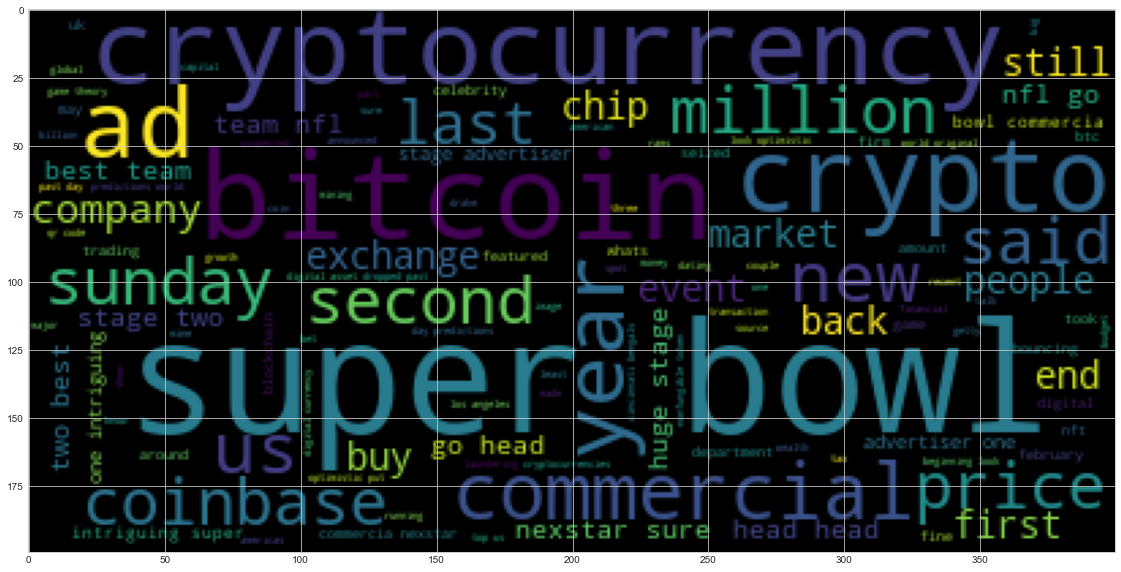

In [52]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(btc_sentiment_scores['text']))
    )
)
plt.imshow(wc_btc);


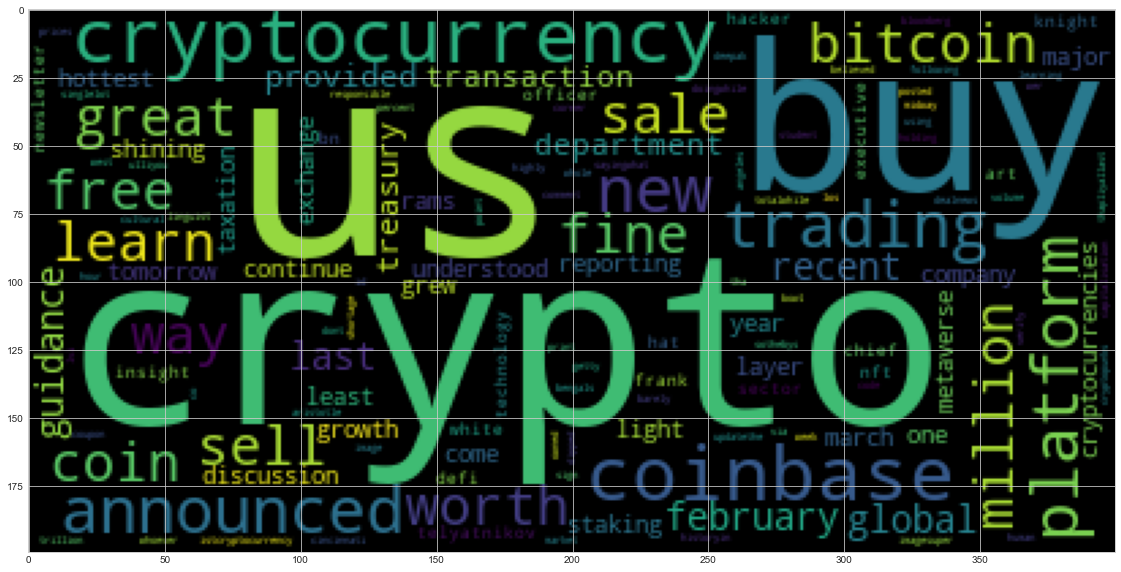

In [53]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(eth_sentiment_scores['text']))
    )
)
plt.imshow(wc_eth);


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [63]:
import spacy
from spacy import displacy

In [64]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [65]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [73]:
# Concatenate all of the Bitcoin text together
btc_doc = ' '.join(btc_sentiment_scores['text'])

In [74]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_doc)

# Add a title to the document
btc_doc.user_data["title"] = "BTC NER"

In [75]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [76]:
# List all Entities
btc_ent_df = pd.DataFrame(
    [
        (ent.text, ent.label_)
        for ent in btc_doc.ents
    ],
    columns=['text', 'label']
)
btc_ent_df.head()

,text,label
0,Whitehead,ORG
1,Lohstroh,ORG
2,$3.6 billion,MONEY
3,America,GPE
4,Justice Department,ORG


---

### Ethereum NER

In [77]:
# Concatenate all of the Ethereum text together
eth_doc = ' '.join(eth_sentiment_scores['text'])

In [78]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_doc)

# Add a title to the document
eth_doc.user_data["title"] = "ETH NER"

In [79]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [80]:
# List all Entities
btc_ent_df = pd.DataFrame(
    [
        (ent.text, ent.label_)
        for ent in eth_doc.ents
    ],
    columns=['text', 'label']
)
btc_ent_df.head()

,text,label
0,Coinbase,PERSON
1,DEALNEWS10,WORK_OF_ART
2,Buy Bitcoin,PERSON
3,West,LOC
4,Aristotle,ORG


---